# Model Analysis Notebook
### This notebook will cover our usages of KNN and KMeans model to classify League of Legends characters.

Our project is about using machine learning models to predict a characters ranking based off of their strength in a patch.
A patch is essentially an update applied to the game by the developers in order to keep the game feeling fresh. 
They target the strength of the champions and items, adjusting it to make the game more even for every character. 
Our models analyze data published by Riot Games in order to create strength rankings for a set of patches.

The basic idea of ranks is to try and categorize the strength of the numerous characters in the game. It gets the point across to a reader on which character is better or worse. This leads to the idea of "meta," short for "Most Effect Tactic Available." Due to the nature of competitive games, players often aim to get an advantage on each other in order to win a match. This is commonly done by playing the strongest character on the patch. The idea of playing stronger characters also applies to pro-players in the world of esports, where they compete in various tournaments and leagues to earn money and a chance to compete internationally. Our aim with these models is to create intuitive rankings to help players decide on which characters are the best in a patch.

## KNN Model Analysis: Authored by John Paul Silvas
The KNN model was already constructed and ran in the KNNTierlist.ipynb notebook. This analysis will go over the character rankings this model produced for patch 15.20.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import Image


In [13]:
# load the knn rankings
KNN_preds = pd.read_csv("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/lol_patch_tierlist/lolpatch_15.20.csv").sort_values("rank")
KNN_preds.head()

,patch,champion,win_rate,pick_rate,ban_rate,rank
0,15.2,Ashe,51.34,14.88,10.66,1
1,15.2,Irelia,50.49,3.88,12.78,2
2,15.2,Nami,51.97,7.70,1.51,3
3,15.2,Sion,51.63,5.83,2.05,4
4,15.2,Taric,52.53,1.17,0.23,5


In [14]:
train_ranks = pd.read_csv("../datasets/lol_patch_tierlist/lolpatch_15.20.csv").sort_values("rank")
train_ranks.head()

,patch,champion,win_rate,pick_rate,ban_rate,rank
0,15.2,Ashe,51.34,14.88,10.66,1
1,15.2,Irelia,50.49,3.88,12.78,2
2,15.2,Nami,51.97,7.70,1.51,3
3,15.2,Sion,51.63,5.83,2.05,4
4,15.2,Taric,52.53,1.17,0.23,5


In [15]:
# both datasets have the same amount of characters
print(KNN_preds.shape)
print(train_ranks.shape)

(171, 6)
(171, 6)


### Explaining the basics of the KNN Model.
This model calculates the distance of any given point from win, pick, and ban rate. The ranks come from the lol_patch_tierlist folder in our datasets, which was scraped from Lolayltics. This is their pre-engineered feature for their rankings, while the win, pick, and ban rate was aggregated from millions of matches they scraped. 

Once I tuned the parameters for the most accurate model in terms of both neighbors and normalization methods, I applied the KNN model to the Riot API data collected by Brandon. This is representative of the dataset above, where it was the csv Brandon produced by scraping from the Riot Games' public API, combined with the rankings produced by implementing the KNN model's predictions. 

Succinctly, everything in the win, pick, and ban rate columns is independently collected data, while the rank column is the KNNs prediction of a character's strength based off their statistics. The final parameter for the KNN model was 7 neighbors, and it was trained on z-score normalized data.

In [16]:
def rank_cutting(ranks):
    fig = plt.figure(figsize=(10,10))

    # knn 3d subplot
    ax = fig.add_subplot(121, projection='3d')

    KNN_preds_cut = KNN_preds[(KNN_preds["rank"] > ranks[0]) & (KNN_preds["rank"] < ranks[1])]
    x = KNN_preds_cut["win_rate"]
    y = KNN_preds_cut["pick_rate"]
    z = KNN_preds_cut["ban_rate"]
    colors = KNN_preds_cut["rank"]
    ax.scatter(x, y, z, c=colors)
    
    # labels
    ax.set_title('KNN Predicted Rankings\nfor Patch 12.20')
    ax.set_xlabel('Win Rate (%)')
    ax.set_ylabel('Pick Rate (%)')
    ax.set_zlabel('Ban Rate (%)')
    ax.set_box_aspect(None, zoom=0.85)
    
    # original lolalytics subplot
    ax2 = fig.add_subplot(122, projection='3d')

    train_ranks_cut = train_ranks[(train_ranks["rank"] > ranks[0]) & (train_ranks["rank"] < ranks[1])]
    x = train_ranks_cut["win_rate"]
    y = train_ranks_cut["pick_rate"]
    z = train_ranks_cut["ban_rate"]
    colors = train_ranks_cut["rank"]
    ax2.scatter(x, y, z, c=colors)
    
    # labels
    ax2.set_title('Lolalytics Rankings\nfor Patch 12.20')
    ax2.set_xlabel('Win Rate (%)')
    ax2.set_ylabel('Pick Rate (%)')
    ax2.set_zlabel('Ban Rate (%)')
    ax2.set_box_aspect(None, zoom=0.8)
    plt.show()

interact(rank_cutting, ranks=widgets.IntRangeSlider(value=[0, 171],min=0, max=171));

interactive(children=(IntRangeSlider(value=(0, 171), description='ranks', max=171), Output()), _dom_classes=('…

## K-Means Model Analysis

The K-Means Model was constructed and ran in the LOL_KMeans_TierList.ipynb. This analysis goes over the character rankings that the K-Means model produced for 15.20. I produced the figures from the previous notebook.

In [6]:
kmeans_pred = pd.read_csv("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/riot_out/patch_15.20/tierlist_patch_15.20.csv")
kmeans_pred.head()

,patch,championId,championName,games,wins,win_rate,pick_rate,ban_rate,cluster,tier
0,15.2,266,Aatrox,10,5,50.0,4.082,9.2,0,S
1,15.2,103,Ahri,10,5,50.0,4.082,3.6,1,A
2,15.2,84,Akali,10,4,40.0,4.082,9.6,0,S
3,15.2,166,Akshan,10,3,30.0,4.082,5.6,0,S
4,15.2,12,Alistar,10,4,40.0,4.082,2.4,1,A


In [7]:
riot_data = pd.read_csv("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/riot_out/patch_15.20/champion_winrates_15.20_20251120-204220.csv")
riot_data.head()

,patch,championId,championName,games,wins,win_rate,pick_rate,ban_rate
0,15.2,266,Aatrox,10,5,50.0,4.082,9.2
1,15.2,103,Ahri,10,5,50.0,4.082,3.6
2,15.2,84,Akali,10,4,40.0,4.082,9.6
3,15.2,166,Akshan,10,3,30.0,4.082,5.6
4,15.2,12,Alistar,10,4,40.0,4.082,2.4


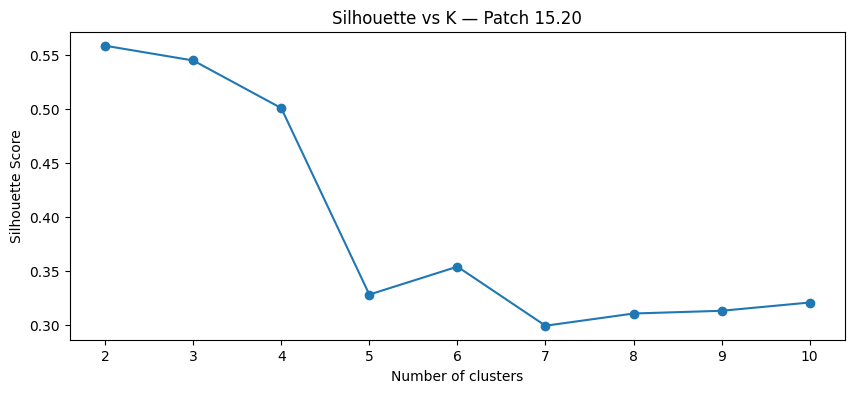

In [18]:
Image("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/riot_out/plots/patch_15.20/silhouette_patch_15.20.png")

In [19]:
# K-Means Diagnostics Patch 15.20
pd.read_csv("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/riot_out/plots/patch_15.20/kmeans_diagnostics_patch_15.20.csv").head()

,patch,K,SSE,silhouette
0,15.2,2,716.890015,0.558596
1,15.2,3,590.277530,0.544927
2,15.2,4,461.393904,0.500854
3,15.2,5,352.442716,0.328280
4,15.2,6,263.403572,0.354106


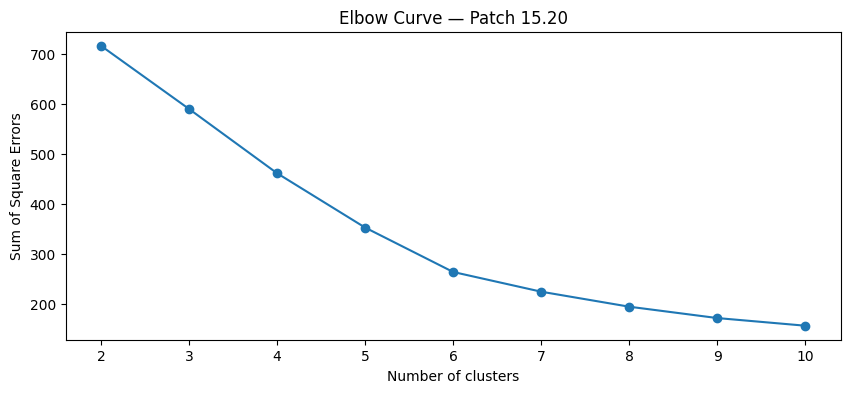

In [20]:
Image("/Users/brandonlee/Documents/GitHub/cs171_league_analysts_in_training/Datasets/riot_out/plots/patch_15.20/elbow_sse_patch_15.20.png")

# Explanations of Graphs
The elbow curve shows how SSE always decreases as K increases. In this curve for patch 15.20, the elbow happens near K=4-5. This is where the model complexity starts to outpace fit improvement. The silhouette graph has a range of -1 to 1, where the higher the value, the better the separataion between clusters. K=2-4 is above 0.5, which is good, but K=5-6 has the weakest separation of 0.328 and 0.354, but is useable. To make it similar to 3rd party tier lists across the internet (S/A/B/C/D), K=5 is the best choice for comparison. If prioritizing cluster quality, K=3-4 would be the best. K=6 would be best for the mot